# Ejemplo Extraccion Basica de Caracteristicas en imagenes: 
## Tratamiento de señales 3-Virtual UdeA
### Paula Andrea Pérez Toro

In [1]:
# Librerias
import numpy as np                     

import matplotlib.image as mpimg       
import matplotlib.pyplot as plt        
import matplotlib.patches as mpatches  

from skimage import measure            


import scipy.ndimage as ndi            # Esta se utiliza para determinar el centro de masa


# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # Sirve paradefinir el tamaño de todos los plots desde el inicio


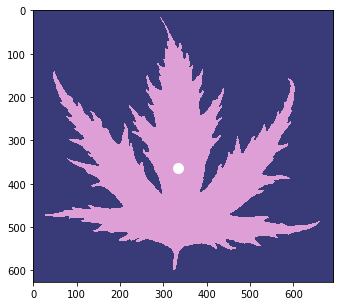

In [19]:
# Lectura de los datos con MATPLOTLIB
img = mpimg.imread('/home/paulaperezt/Documents/Master/UdeA/InstructorStudent/TTS3/Slides/Extraccion_Caracteristicas_Imagenes_21-01-2020/images/110.jpg')

# Scipy, es una libreria de procesamiento de señales, también tiene un modulo de imagenes
cy, cx = ndi.center_of_mass(img) #Obtengo el centro de masa

plt.imshow(img, cmap='tab20b')  # Para mostrar la imagen, en este caso una hoja
plt.scatter(cx, cy, color='white', linewidths=5)           # Me muestra el centro
plt.show()


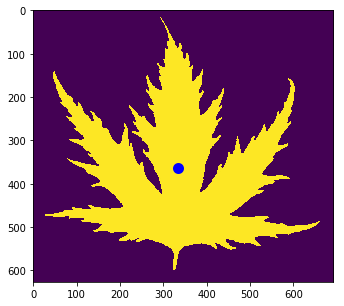

In [20]:
plt.imshow(img)  # Para mostrar la imagen, en este caso una hoja
plt.scatter(cx, cy, color='blue', linewidths=5)           # Me muestra el centro
plt.show()


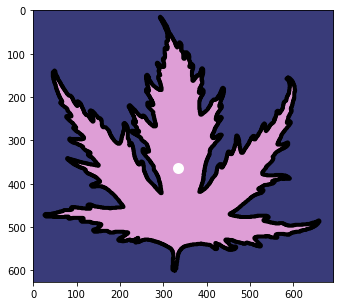

In [21]:
# scikit-learn también tiene funciones para este tipo de situaciones, esta sera la libreria que mas usemos adelante 
#Para esta situación la usaremos para encontrar el contorno de la hoja
contours = measure.find_contours(img, .8) 

# Escogeremos el contorno más largo
contour = max(contours, key=len)


plt.plot(contour[:,1], contour[:,0], linewidth=4, color='black')  # Contorno
plt.imshow(img, cmap='tab20b')
plt.scatter(cx, cy, color='white', linewidths=5)           # Me muestra el centro

plt.show()

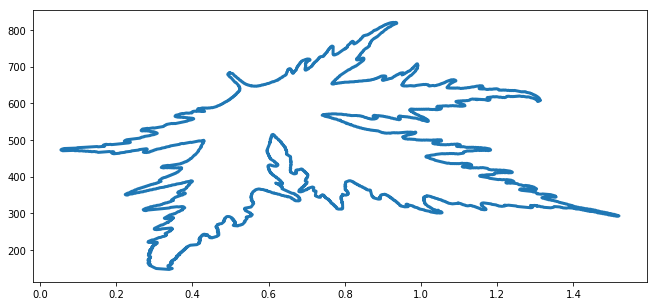

In [22]:
# Coordendas cartesianas a polares
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2) #Magnitud
    phi = np.arctan2(y, x) #Angulo
    return [rho, phi]


polar_contour = np.array([cart2pol(x, y) for x, y in contour]) #Es una forma de hacer el for, x, y seran rho y phi

"""polar_contour=[]
for x,y in contour:
    polar_contour.append(cart2pol(x, y))"""
    

plt.plot(polar_contour[:,1], polar_contour[:,0], linewidth=3)
plt.show()

In [23]:


# Aqui vamos a restar la media, lo que llamamos volver media zero, centramos la imagen en cero
contour[:,1] -= cx #contour[:,1] = contour[:,1]-cx  
contour[:,0] -= cy 



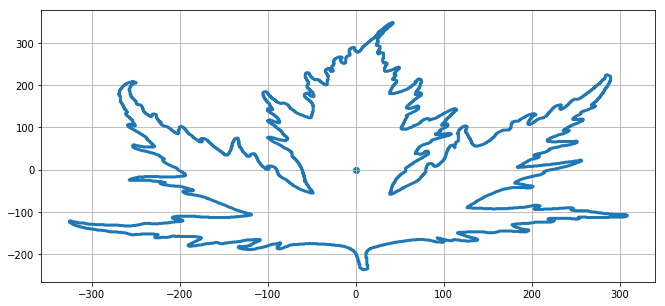

In [24]:
#Volteamos la imagen ya centrada en cero

plt.plot(-contour[:,1], -contour[:,0], linewidth=3)
plt.grid()
plt.scatter(0, 0)
plt.show()

In [25]:
# Ahora con las coordenadas cartesianas centradas en cero, volvemos a hallar las coordenadas polares
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

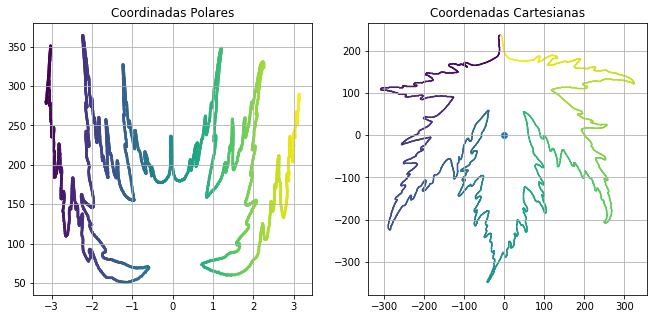

In [26]:


# and plotting the result
rcParams['figure.figsize'] = (11, 5)

plt.subplot(121)
#Coordenadas Polares
plt.scatter(polar_contour[:,1], polar_contour[:,0], linewidth=2, s=.5, c=polar_contour[:,1])
plt.title('Coordinadas Polares')
plt.grid()
plt.subplot(122)
#Coordenadas Cartesianas
plt.scatter(contour[:,1],             
            contour[:,0],             
            linewidth=0, s=2,         
            c=range(len(contour)))     
plt.scatter(0, 0)
plt.title('Coordenadas Cartesianas')
plt.grid()
plt.show()

### Espacio Polar

<img src="espacioPolar.jpeg">

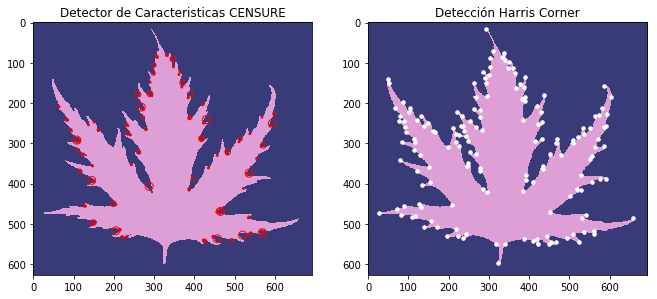

In [27]:



from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE

detector = CENSURE()
detector.detect(img)

coords = corner_peaks(corner_harris(img), min_distance=5)
#coords_subpix = corner_subpix(img, coords, window_size=13)

plt.subplot(121)
plt.title('Detector de Caracteristicas CENSURE')
plt.imshow(img, cmap='tab20b')
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')

plt.subplot(122)
plt.title('Detección Harris Corner')
plt.imshow(img, cmap='tab20b')  # show me the leaf
plt.plot(coords[:, 1], coords[:, 0], '.w', markersize=7)
plt.show()



In [29]:
coords.shape,contour.shape

((161, 2), (7117, 2))

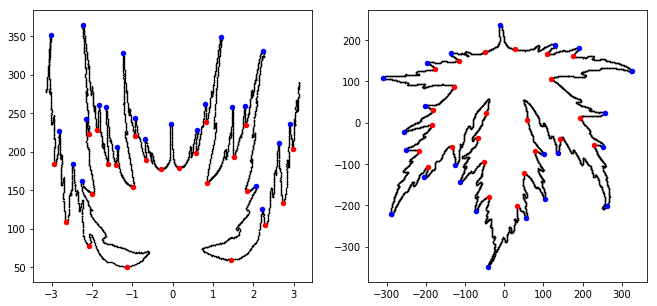

In [30]:

#Buscamos los maximos (y minimos tambien) para encontrar los vertices

from scipy.signal import argrelextrema 

# Para maximos locales
#np.grater y np.less es para comparar entre punto y el orden la iteraciones
c_max_index = argrelextrema(polar_contour[::,0], np.greater, order=50) 
c_min_index = argrelextrema(polar_contour[::,0], np.less, order=50)

plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], 
            linewidth=0, s=2, c='k')
plt.scatter(polar_contour[::,1][c_max_index], 
            polar_contour[::,0][c_max_index], 
            linewidth=0, s=30, c='b')
plt.scatter(polar_contour[::,1][c_min_index], 
            polar_contour[::,0][c_min_index], 
            linewidth=0, s=30, c='r')

plt.subplot(122)
plt.scatter(contour[::,1], contour[::,0], 
            linewidth=0, s=2, c='k')
plt.scatter(contour[::,1][c_max_index], 
            contour[::,0][c_max_index], 
            linewidth=0, s=30, c='b')
plt.scatter(contour[::,1][c_min_index], 
            contour[::,0][c_min_index], 
            linewidth=0, s=30, c='r')

plt.show()



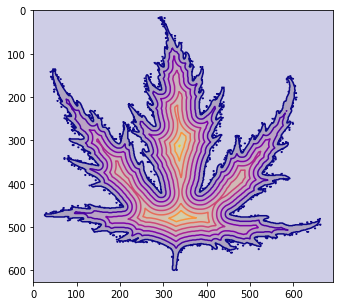

In [31]:
# Considerando distancias, tomando en cuenta la morfologia del grafico

dist_2d = ndi.distance_transform_edt(img)
plt.imshow(img, cmap='Greys', alpha=.2)
plt.imshow(dist_2d, cmap='plasma', alpha=.2)
plt.contour(dist_2d, cmap='plasma')
plt.show()